# Simulação de Títulos atrelados ao CDI

Este notebook analisa diferentes cenários de investimento em CDB,
comparando rendimento bruto, líquido e capital não investido.

### 1. Importações

In [1]:
import sys
import os

# Adiciona a pasta 'src' ao path
sys.path.append(os.path.abspath("../src"))

import finbr
import numpy as np
import matplotlib.pyplot as plt
from titulo import calcular_titulo, plotarcdb

### 2. Captura do CDI atual

In [2]:
cdi_atual = finbr.cdi() * 100
print(f"CDI atual: {round(cdi_atual, 2)}% a.a")

CDI atual: 14.9% a.a


### 4. Investimento em CDB

- **Período:** 5 anos (60 meses)  
- **CDI:** Atual
- **Capital inicial:** R$ 10.000,00  
- **Aportes mensais:** R$ 1.300,00  

**Objetivo:** simular o crescimento do capital investido em um CDB que rende 105% do CDI ao longo de 5 anos, considerando juros compostos, desconto de IR e aportes mensais.

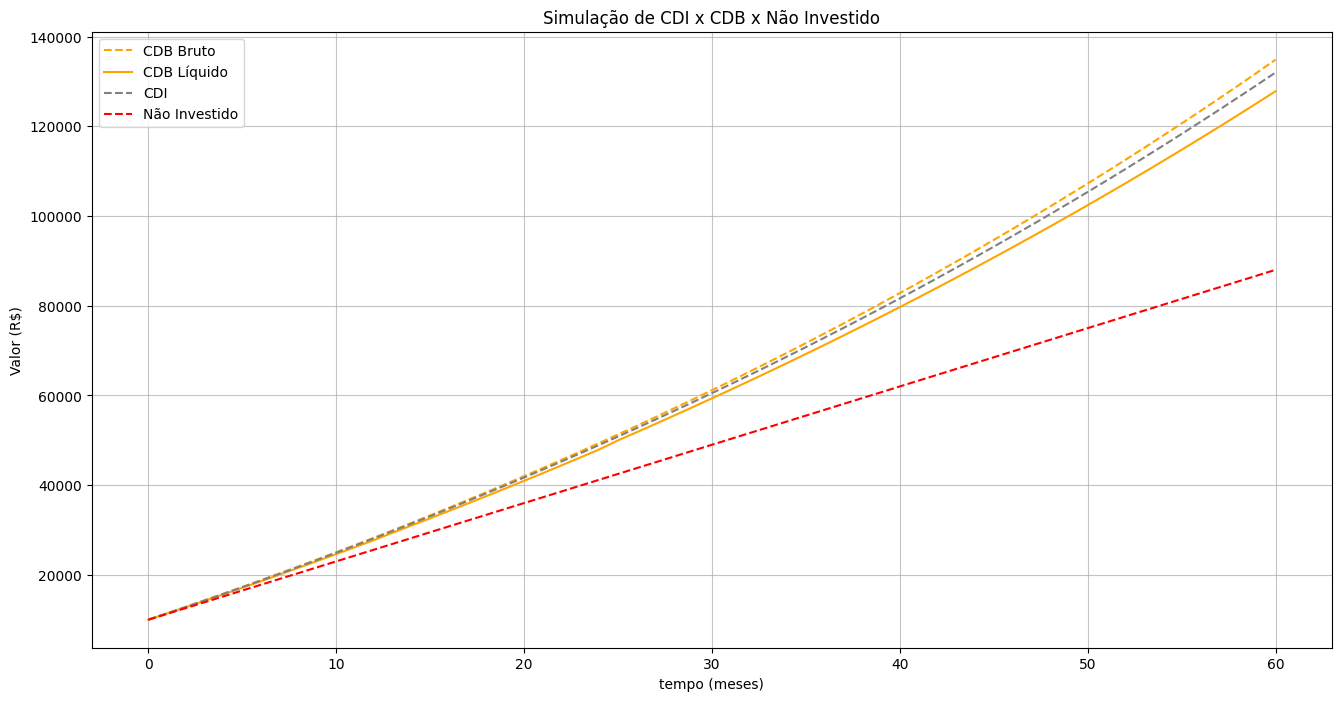

In [3]:
periodo = 12 * 5
CDI = cdi_atual
CDB = 105
capital = 10000
aportes = 1300

MCDB, MCDI, caixa, Mliq, t = calcular_titulo(periodo, CDI, CDB, capital, aportes)

plotarcdb(MCDB, MCDI, caixa, Mliq, t)

### 5. Investimento em LCI / LCA

- **Período:** 10 anos (120 meses)  
- **CDI:** Atual
- **Capital inicial:** R$ 15.000,00  
- **Aportes mensais:** R$ 850,00  

**Objetivo:** simular o crescimento do capital investido em um LCI que rende 92% do CDI ao longo de 10 anos, considerando juros compostos e aportes mensais.

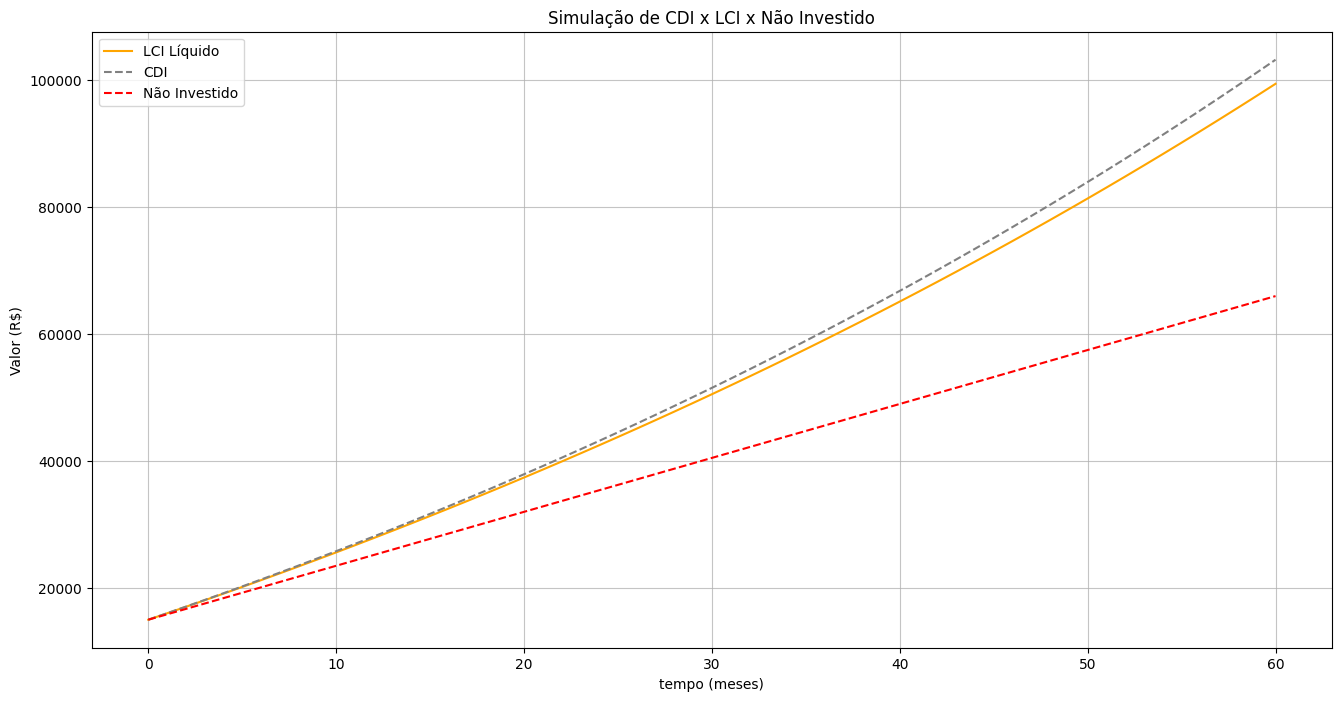

In [4]:
periodo = 12 * 5
CDI = cdi_atual
LCI = 92
capital = 15000
aportes = 850
tipo_titulo = 'LCI'


MLCI, MCDI, caixa, Mliq, t = calcular_titulo(periodo, CDI, LCI, capital, aportes, tipo_titulo)

plotarcdb(MLCI, MCDI, caixa, Mliq, t, tipo_titulo)

### 5. Comparação: Banco A vs Banco B

Comparação de dois CDBs com diferentes percentuais do CDI:

- **Banco A:** 115% do CDI  
- **Banco B:** 105% do CDI

Perfil:

- **Período:** 1 ano (12 meses)  
- **CDI:** 12% a.a
- **Capital inicial:** R$ 150.000,00  
- **Aportes mensais:** R$ 1.000,00  


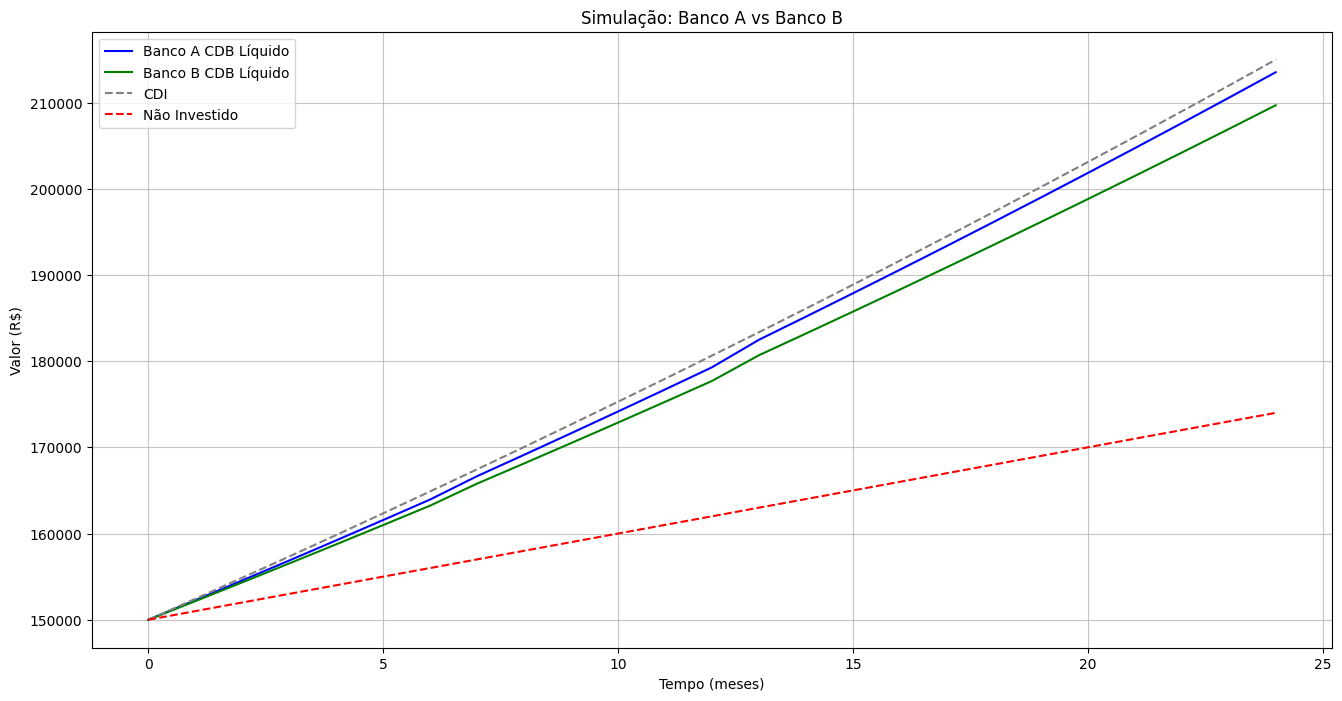

In [5]:
periodo = 24
CDI = 12
capital = 150000
aportes = 1000

# Parâmetros Banco A
CDB_A = 115

# Parâmetros Banco B
CDB_B = 105

# Cálculo para Banco A
MCDB_A, MCDI_A, caixa_A, Mliq_A, t = calcular_titulo(periodo, CDI, CDB_A, capital, aportes)

# Cálculo para Banco B
MCDB_B, MCDI_B, caixa_B, Mliq_B, t = calcular_titulo(periodo, CDI, CDB_B, capital, aportes)

# Plot Comparativo
plt.figure(figsize=(16,8))

# Banco A
plt.plot(t, Mliq_A, color='blue', linestyle='-', label='Banco A CDB Líquido')

# Banco B
plt.plot(t, Mliq_B, color='green', linestyle='-', label='Banco B CDB Líquido')

# CDI e Caixa (opcional, apenas para referência)
plt.plot(t, MCDI_A, color='gray', linestyle='--', label='CDI')
plt.plot(t, caixa_A, color='red', linestyle='--', label='Não Investido')

plt.title("Simulação: Banco A vs Banco B")
plt.xlabel("Tempo (meses)")
plt.ylabel("Valor (R$)")
plt.grid(True, alpha=0.75)
plt.legend()
plt.show()